### Questions to Answer
(Respective datasets in parentheses) 

1. Which counties have the highest percentage of occupied housing tracts enrolled in SNAP? (Food Access Research Atlas)

2. What are the demographics of those counties? (Food Access Research Atlas) What about regions? (Food Access Research Atlas)

3. Do more seniors or kids live in areas with low access to food? (Food Access Research Atlas)

4. Are the counties with highest percentages of SNAP enrollments also the counties with the highest percentages of food insecurity? (Food Access Research Atlas)

5. Which counties have the highest/lowest disparities in food access among census tracts? Of those counties, how do the min/max food insecure tract demographics compare? (Food Access Research Atlas)

6. Do counties with the highest levels of income disparity tend to have higher percentages of food insecurity? (Food Access Research Atlas and Census Household Income)

7. Of the counties with the highest levels of food insecurity, what percentage of these tracts are in the lowest income brackets? (Food Access Research Atlas and Census Household Income)

8. Of the counties with the highest levels of food insecurity, what does spending for children’s programs look like? How has it changed over time? What about counties with the lowest levels of food insecurity? (TN Children Served)

9. What are the highest enrollments for children's programs? highest expenditures? and highest expenditures per child? (TN Children Served)

10. Which counties/programs have more reliable data? Look at “actual” vs “estimate”, NaN and outlier values for children served/expenditures. (TN Children Served)

11. How much do counties spend on SNAP and other food programs? How does that correlate with a county’s total SNAP enrollment? (Food Access Research Atlas and TN Children Served)



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
tn_food_access_df = pd.read_excel('../data/tn_food_access_clean_excel.xlsx')

In [3]:
tn_food_access_df.head()

,ct_long,county,county_and_state,region,state,country,Urban,Pop2010,OHU2010,TractLOWI,...,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share
0,47001020100,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3111,1546,1381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47001020201,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3670,1535,604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47001020202,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,4507,2025,1741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47001020300,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3822,1656,1077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47001020400,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,4508,2013,1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Which counties have the highest percentage of occupied housing units enrolled in SNAP? (Food Access Research Atlas)


`TractSNAP` - Total count of housing units receiving SNAP benefits in tract 

`county_and_state` groupby

`OHU2010` - Occupied housing unit count from 2010 census


In [4]:
tn_food_access_df['pct_ohu_snap'] = round((tn_food_access_df['TractSNAP']/tn_food_access_df['OHU2010']*100),2)

In [5]:
tn_food_access_df.head()

,ct_long,county,county_and_state,region,state,country,Urban,Pop2010,OHU2010,TractLOWI,...,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,pct_ohu_snap
0,47001020100,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3111,1546,1381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.33
1,47001020201,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3670,1535,604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.02
2,47001020202,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,4507,2025,1741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.27
3,47001020300,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3822,1656,1077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.58
4,47001020400,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,4508,2013,1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.17


In [6]:
pct_ohu_snap_by_county = round((tn_food_access_df.groupby('county_and_state')['pct_ohu_snap'].mean()),2)

In [7]:
print(pct_ohu_snap_by_county)

county_and_state
Anderson, Tennessee      16.92
Bedford, Tennessee       15.75
Benton, Tennessee        19.09
Bledsoe, Tennessee       27.56
Blount, Tennessee        12.97
                         ...  
Wayne, Tennessee         16.72
Weakley, Tennessee       19.09
White, Tennessee         17.61
Williamson, Tennessee     3.13
Wilson, Tennessee        10.29
Name: pct_ohu_snap, Length: 95, dtype: float64


In [8]:
pct_ohu_snap_by_county_df = pd.DataFrame(pct_ohu_snap_by_county).reset_index()

In [9]:
# using earlier code for reference:
# tn_food_access_df[tn_food_access_df['Pop2010'].iloc[:]==tn_food_access_df['Pop2010'].iloc[:].min()]

pct_ohu_snap_by_county_df[pct_ohu_snap_by_county_df['pct_ohu_snap'].iloc[:]==pct_ohu_snap_by_county_df['pct_ohu_snap'].iloc[:].min()]

,county_and_state,pct_ohu_snap
93,"Williamson, Tennessee",3.13


In [10]:
pct_ohu_snap_by_county_df[pct_ohu_snap_by_county_df['pct_ohu_snap'].iloc[:]==pct_ohu_snap_by_county_df['pct_ohu_snap'].iloc[:].max()]

,county_and_state,pct_ohu_snap
47,"Lake, Tennessee",36.79


<Axes: ylabel='Count'>

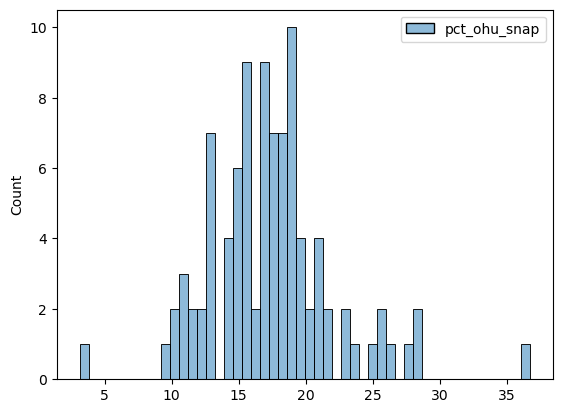

In [11]:
sns.histplot(pct_ohu_snap_by_county_df, bins=50)

In [12]:
highest_snap_counties = pct_ohu_snap_by_county_df.sort_values(by='pct_ohu_snap', ascending=False)

In [13]:
# highest_snap_counties.to_csv('highest_snap_counties.csv')

Taking a look at percentage of occupied housing units enrolled in SNAP by region now:

In [14]:
pct_ohu_snap_by_region = round((tn_food_access_df.groupby('region')['pct_ohu_snap'].mean()),2)

In [15]:
pct_ohu_snap_by_region_df = pd.DataFrame(pct_ohu_snap_by_region).reset_index()

In [16]:
pct_ohu_snap_by_region_df

,region,pct_ohu_snap
0,East,16.14
1,Middle,13.21
2,West,19.96


<Axes: xlabel='region', ylabel='pct_ohu_snap'>

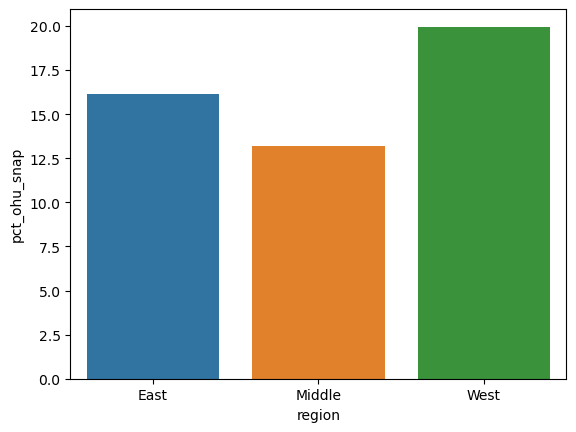

In [17]:
sns.barplot(data=pct_ohu_snap_by_region_df, x='region',y='pct_ohu_snap')

Just did a little Excel magic to the previously-downloaded list of SNAP enrollment by county to add region! Reading it back in here:

In [18]:
counties_and_regions_by_pct_ohu_snap_df = pd.read_csv('../data/highest_snap_counties.csv')

In [19]:
counties_and_regions_by_pct_ohu_snap_df.head(10)

,county_and_state,county,region,pct_ohu_snap
0,"Lake, Tennessee",Lake,West,36.79
1,"Hancock, Tennessee",Hancock,East,28.69
2,"Scott, Tennessee",Scott,East,28.64
3,"Bledsoe, Tennessee",Bledsoe,East,27.56
4,"Union, Tennessee",Union,East,26.32
5,"Fentress, Tennessee",Fentress,Middle,25.71
6,"Morgan, Tennessee",Morgan,East,25.40
7,"Lauderdale, Tennessee",Lauderdale,West,24.98
8,"Pickett, Tennessee",Pickett,Middle,23.98
9,"Haywood, Tennessee",Haywood,West,23.04


In [20]:
counties_and_regions_by_pct_ohu_snap_df.tail(10)

,county_and_state,county,region,pct_ohu_snap
85,"Dickson, Tennessee",Dickson,Middle,11.95
86,"Overton, Tennessee",Overton,Middle,11.86
87,"Cheatham, Tennessee",Cheatham,Middle,11.79
88,"Rutherford, Tennessee",Rutherford,Middle,10.97
89,"Humphreys, Tennessee",Humphreys,Middle,10.90
90,"Sumner, Tennessee",Sumner,Middle,10.75
91,"Wilson, Tennessee",Wilson,Middle,10.29
92,"Moore, Tennessee",Moore,Middle,10.14
93,"Loudon, Tennessee",Loudon,East,9.47
94,"Williamson, Tennessee",Williamson,Middle,3.13


In [21]:
countries_and_regions_df = counties_and_regions_by_pct_ohu_snap_df

2. What are the demographics of those counties? (Food Access Research Atlas) What about regions? (Food Access Research Atlas)


In [22]:
tn_food_access_df.head()

,ct_long,county,county_and_state,region,state,country,Urban,Pop2010,OHU2010,TractLOWI,...,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,pct_ohu_snap
0,47001020100,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3111,1546,1381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.33
1,47001020201,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3670,1535,604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.02
2,47001020202,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,4507,2025,1741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.27
3,47001020300,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3822,1656,1077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.58
4,47001020400,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,4508,2013,1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.17


In [23]:
tn_food_access_df['pct_LOWI'] = round((tn_food_access_df['TractLOWI']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_kids'] = round((tn_food_access_df['TractKids']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_seniors'] = round((tn_food_access_df['TractSeniors']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_white'] = round((tn_food_access_df['TractWhite']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_black'] = round((tn_food_access_df['TractBlack']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_asian'] = round((tn_food_access_df['TractAsian']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_pac_isl'] = round((tn_food_access_df['TractNHOPI']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_aian'] = round((tn_food_access_df['TractAIAN']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_o_multir'] = round((tn_food_access_df['TractOMultir']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_hispanic'] = round((tn_food_access_df['TractHispanic']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_no_vehicle'] = round((tn_food_access_df['TractHUNV']/tn_food_access_df['OHU2010']*100),2)
tn_food_access_df['pct_lapop1_10'] = round((tn_food_access_df['LAPOP1_10']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_lapop05_10'] = round((tn_food_access_df['LAPOP05_10']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_lapop1_20'] = round((tn_food_access_df['LAPOP1_20']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_lalowi1_10'] = round((tn_food_access_df['LALOWI1_10']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_lalowi05_10'] = round((tn_food_access_df['LALOWI05_10']/tn_food_access_df['Pop2010']*100),2)
tn_food_access_df['pct_lalowi1_20'] = round((tn_food_access_df['LALOWI1_20']/tn_food_access_df['Pop2010']*100),2)



In [24]:
tn_food_access_df.head()

,ct_long,county,county_and_state,region,state,country,Urban,Pop2010,OHU2010,TractLOWI,...,pct_aian,pct_o_multir,pct_hispanic,pct_no_vehicle,pct_lapop1_10,pct_lapop05_10,pct_lapop1_20,pct_lalowi1_10,pct_lalowi05_10,pct_lalowi1_20
0,47001020100,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3111,1546,1381,...,0.29,4.76,4.66,13.32,5.18,41.34,5.18,2.31,17.52,2.31
1,47001020201,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3670,1535,604,...,0.16,2.89,2.29,3.19,30.79,63.57,30.79,5.18,10.00,5.18
2,47001020202,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,4507,2025,1741,...,0.40,3.97,4.75,8.59,30.02,58.69,30.02,1.31,15.86,1.31
3,47001020300,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,3822,1656,1077,...,0.47,5.57,4.68,3.20,75.98,98.90,75.98,20.09,28.05,20.09
4,47001020400,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1,4508,2013,1995,...,0.44,7.36,6.14,4.27,11.73,63.38,11.73,6.01,32.19,6.01


In [25]:
# tn_food_access_df.to_csv('test_tn_access.csv')

In [26]:
# pct_ohu_snap_by_region = round((tn_food_access_df.groupby('region')['pct_ohu_snap'].mean()),2)

In [27]:
countries_and_regions_lowi = round((tn_food_access_df.groupby('county')['pct_LOWI'].mean()),2)
countries_and_regions_lowi.head()

county
Anderson    36.04
Bedford     41.59
Benton      46.23
Bledsoe     49.86
Blount      31.18
Name: pct_LOWI, dtype: float64

In [28]:
countries_and_regions_df['pct_LOWI'] = round((tn_food_access_df.groupby('county_and_state')['pct_LOWI'].mean()),2)
countries_and_regions_df.head()


,county_and_state,county,region,pct_ohu_snap,pct_LOWI
0,"Lake, Tennessee",Lake,West,36.79,NaN
1,"Hancock, Tennessee",Hancock,East,28.69,NaN
2,"Scott, Tennessee",Scott,East,28.64,NaN
3,"Bledsoe, Tennessee",Bledsoe,East,27.56,NaN
4,"Union, Tennessee",Union,East,26.32,NaN


In [29]:
tn_food_access_to_group = pd.read_csv('../data/tn_food_access_to_group.csv')

In [30]:
averaged_county_food_data = tn_food_access_to_group.groupby(['county','region']).mean().round(2)

In [31]:
median_county_food_data = tn_food_access_to_group.groupby(['county','region']).median().round(2)

In [32]:
averaged_county_food_data.head()

,,Urban,Pop2010,OHU2010,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,...,pct_o_multir,pct_hispanic,pct_no_vehicle,pct_lapop1_10,pct_lapop05_10,pct_lapop1_203 - food_access_eda.ipynb,pct_lalowi1_10,pct_lalowi05_10,pct_lalowi1_20,pct_lapop1_20
county,region,,,,,,,,,,,,,,,,,,,,,
Anderson,East,0.47,4419.35,1838.41,1571.18,968.47,768.47,4062.65,167.47,47.24,1.06,...,3.02,2.56,5.33,25.87,60.67,28.28,6.26,21.39,6.57,28.28
Bedford,Middle,0.33,5006.44,1836.67,2211.89,1341.00,648.22,4094.22,396.00,38.89,5.22,...,7.69,9.55,4.38,25.43,38.69,51.85,9.65,16.40,20.87,51.85
Benton,West,0.20,3297.80,1412.60,1532.00,676.20,656.20,3147.40,64.20,12.40,0.00,...,1.74,1.72,8.04,26.79,42.08,24.73,12.23,20.28,11.51,24.73
Bledsoe,East,0.00,4292.00,1565.67,2111.00,922.67,659.00,4016.00,156.67,5.67,1.00,...,2.19,1.88,5.95,6.64,6.64,NaN,2.70,2.70,NaN,NaN
Blount,East,0.46,4393.21,1759.46,1391.39,977.71,706.07,4106.89,120.71,31.25,1.14,...,4.36,2.70,3.51,51.24,71.90,58.81,13.43,22.56,15.26,58.81


In [33]:
tn_food_access_df['lapop20share'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1489 entries, 0 to 1488
Series name: lapop20share
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 11.8 KB


In [34]:
# averaged_county_food_data.to_csv('averaged_county_data.csv')

In [35]:
# median_county_food_data.to_csv('median_county_data.csv')

3. Do more seniors or kids live in areas with low access to food? (Food Access Research Atlas)


In [36]:
# dataset_clean_eligibility = dataset_clean[dataset_clean["Program_Label"] == 'BDI-3 Eligibility Evaluation']
latracts_half_df = tn_food_access_df[tn_food_access_df['LATracts_half']==1]
latracts_1_df = tn_food_access_df[tn_food_access_df['LATracts1']==1]
latracts_10_df = tn_food_access_df[tn_food_access_df['LATracts10']==1]

In [37]:
round((latracts_half_df['pct_kids'].mean()),2)

23.44

In [38]:
round((latracts_half_df['pct_seniors'].mean()),2)

12.68

In [39]:
round((latracts_1_df['pct_kids'].mean()),2)

23.81

In [40]:
round((latracts_1_df['pct_seniors'].mean()),2)

13.14

In [41]:
round((latracts_10_df['pct_kids'].mean()),2)

22.0

In [42]:
round((latracts_10_df['pct_seniors'].mean()),2)

15.54

In [43]:
round((tn_food_access_df['pct_kids'].mean()),2)

23.09

In [44]:
round((tn_food_access_df['pct_seniors'].mean()),2)

13.66

So the tentative conclusion I'm drawing here: the percentage of kids and seniors in low access tracts isn't too different from the overall average.

4. Are the counties with highest average percentages of SNAP enrollments per tract also the counties with the highest average percentages of food insecurity per tract? (Food Access Research Atlas)

In [45]:
pd.read_csv('../data/averaged_county_data_clean.csv')

,county,county_and_state,region,Urban,Pop2010,OHU2010,TractLOWI,TractKids,TractSeniors,TractWhite,...,pct_o_multir,pct_hispanic,pct_no_vehicle,pct_lapop1_10,pct_lapop05_10,pct_lapop1_20,pct_lalowi1_10,pct_lalowi05_10,pct_lalowi1_20,pct_lapop1_20.1
0,Anderson,"Anderson, Tennessee",East,0.47,4419.35,1838.41,1571.18,968.47,768.47,4062.65,...,3.02,2.56,5.33,25.87,60.67,28.28,6.26,21.39,6.57,28.28
1,Bedford,"Bedford, Tennessee",Middle,0.33,5006.44,1836.67,2211.89,1341.00,648.22,4094.22,...,7.69,9.55,4.38,25.43,38.69,51.85,9.65,16.40,20.87,51.85
2,Benton,"Benton, Tennessee",West,0.20,3297.80,1412.60,1532.00,676.20,656.20,3147.40,...,1.74,1.72,8.04,26.79,42.08,24.73,12.23,20.28,11.51,24.73
3,Bledsoe,"Bledsoe, Tennessee",East,0.00,4292.00,1565.67,2111.00,922.67,659.00,4016.00,...,2.19,1.88,5.95,6.64,6.64,NaN,2.70,2.70,NaN,NaN
4,Blount,"Blount, Tennessee",East,0.46,4393.21,1759.46,1391.39,977.71,706.07,4106.89,...,4.36,2.70,3.51,51.24,71.90,58.81,13.43,22.56,15.26,58.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Wayne,"Wayne, Tennessee",Middle,0.00,4255.25,1534.00,1605.75,833.50,674.50,3928.00,...,1.48,1.69,5.38,24.40,24.40,NaN,9.27,9.27,NaN,NaN
91,Weakley,"Weakley, Tennessee",West,0.36,3183.73,1263.45,1235.73,639.09,486.00,2829.45,...,1.92,1.94,7.69,36.16,46.20,47.70,15.68,21.44,19.74,47.70
92,White,"White, Tennessee",Middle,0.33,4306.83,1712.00,2196.83,967.50,755.67,4123.17,...,1.83,1.65,4.66,29.03,34.36,76.76,16.91,19.66,44.29,76.76
93,Williamson,"Williamson, Tennessee",Middle,0.73,4950.86,1753.68,723.92,1449.43,481.27,4425.08,...,2.71,3.91,2.42,60.67,88.18,60.67,6.36,10.34,6.36,60.67


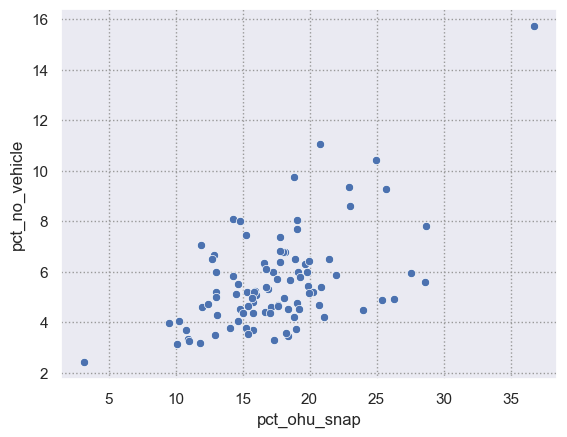

In [52]:
# could probably accomplish this with a scatterplot
sns.scatterplot(data=averaged_county_food_data, x='pct_ohu_snap', y='pct_no_vehicle')
sns.set_style("darkgrid", {"grid.color": "lightsteelblue", "grid.linestyle": ":"})

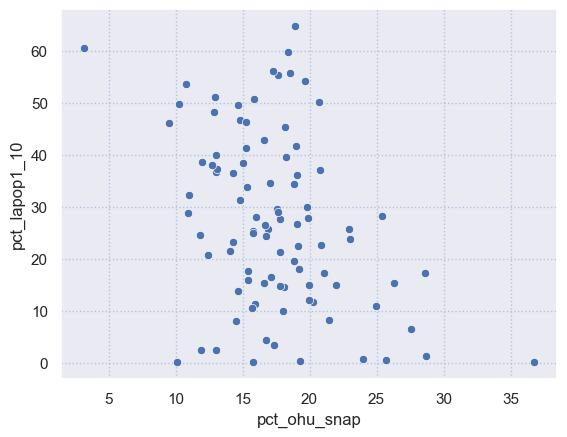

In [53]:
sns.scatterplot(data=averaged_county_food_data, x='pct_ohu_snap', y='pct_lapop1_10')
sns.set_style("darkgrid", {"grid.color": "lightsteelblue", "grid.linestyle": ":"})

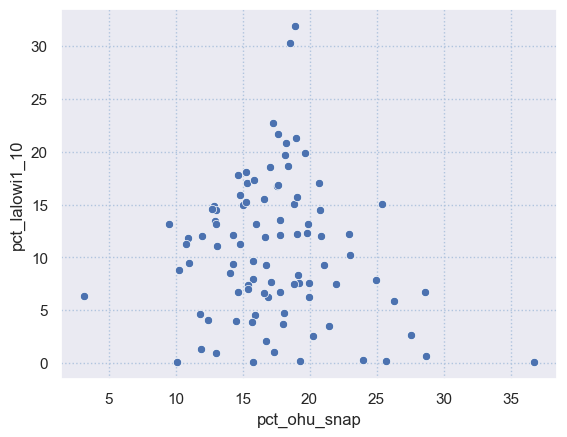

In [54]:
sns.scatterplot(data=averaged_county_food_data, x='pct_ohu_snap', y='pct_lalowi1_10')
sns.set_style("darkgrid", {"grid.color": "lightsteelblue", "grid.linestyle": ":"})

https://www.statology.org/deciles-in-python/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2652960/#:~:text=A%20simple%20but%20effective%20way,used%20by%20Gold%20et%20al

https://www.cdc.gov/nchs/data/series/sr_02/sr02_141.pdf